In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
def get_z_scores(data):
    return stats.zscore(data)

In [4]:
pd_origin = pd.read_excel('/Users/yilewang/workspaces/data4project/prediction_project/prediction_data_included.xlsx', sheet_name='all')

In [12]:
pd_zscores = pd.DataFrame()
pd_zscores['group'] = pd_origin['group']
pd_zscores['caseid'] = pd_origin['caseid']

for i in pd_origin.columns[2:]:
    pd_zscores[i] = get_z_scores(pd_origin[i])
# save to excel
pd_zscores.to_excel('/Users/yilewang/workspaces/data4project/prediction_project/prediction_data_zscores2.xlsx', index=False)

/var/folders/3n/xjq3mj2x4fg20l17q5mydc1c0000gn/T/ipykernel_13937/2962177744.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figure = plt.figure(figsize=(10,5))


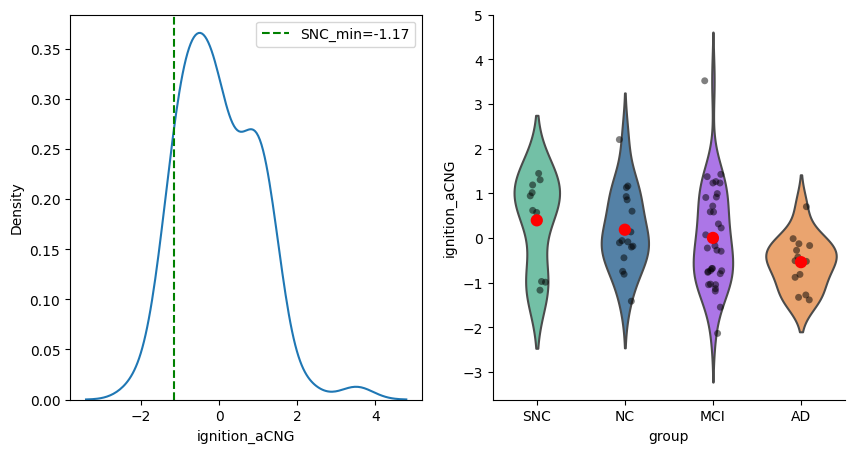

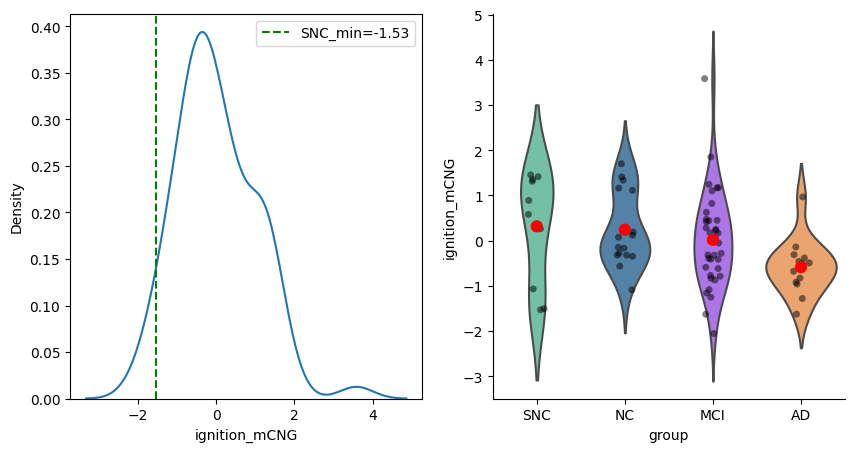

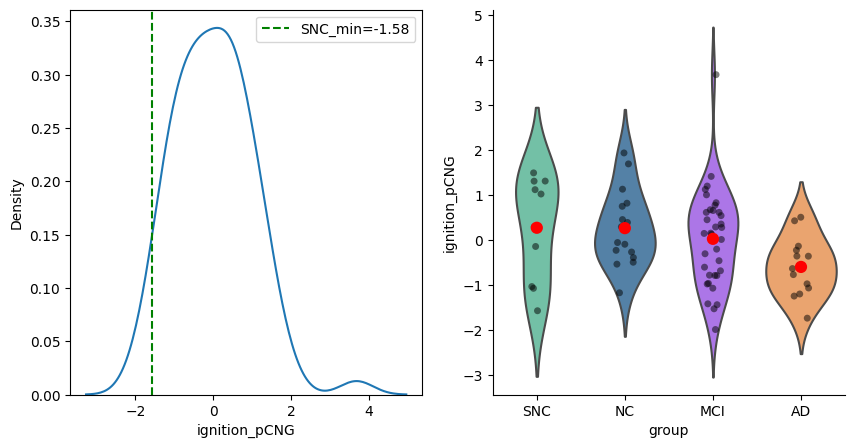

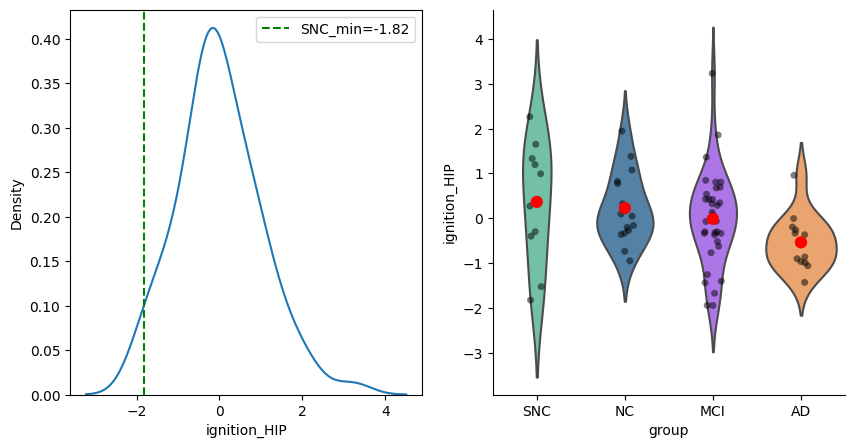

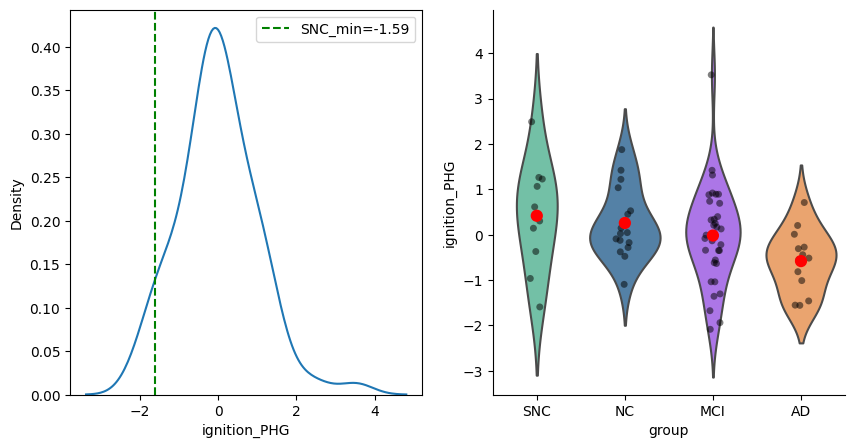

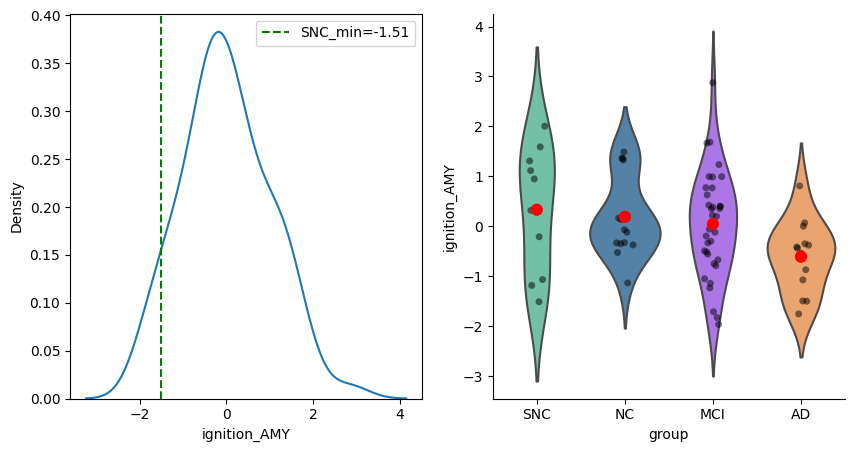

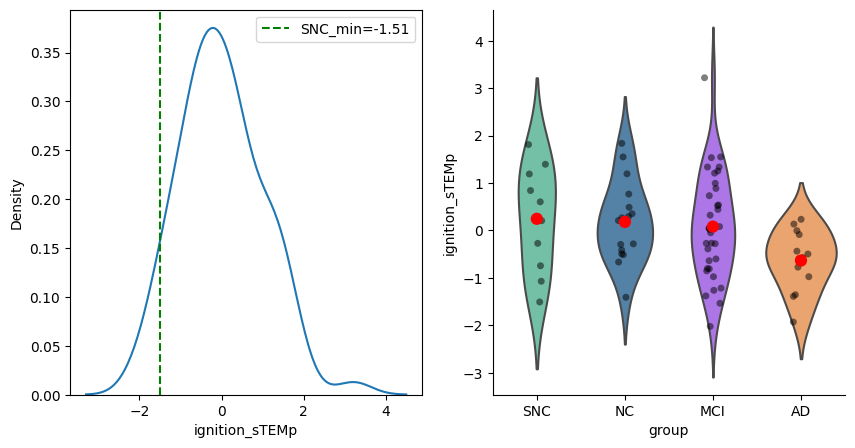

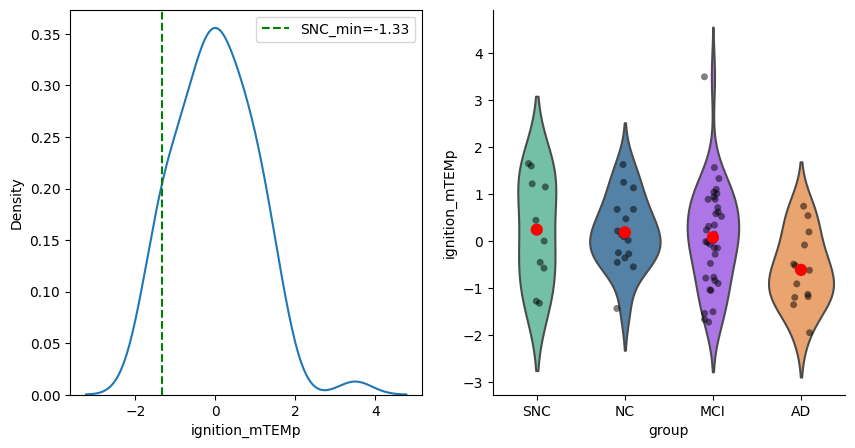

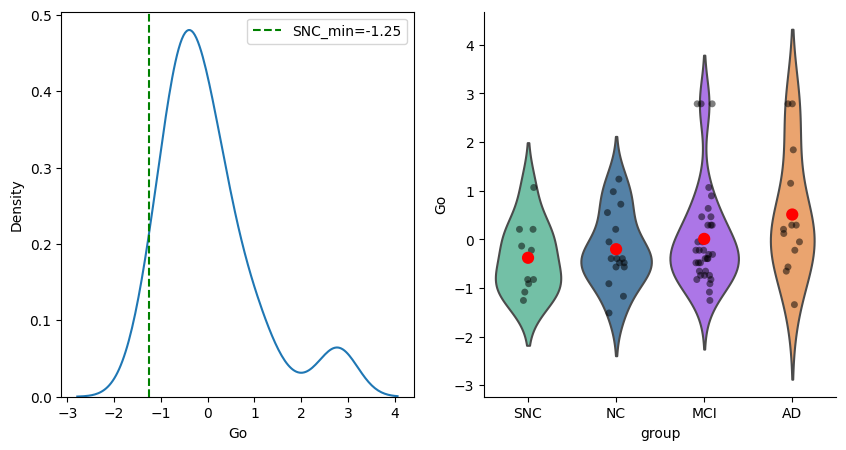

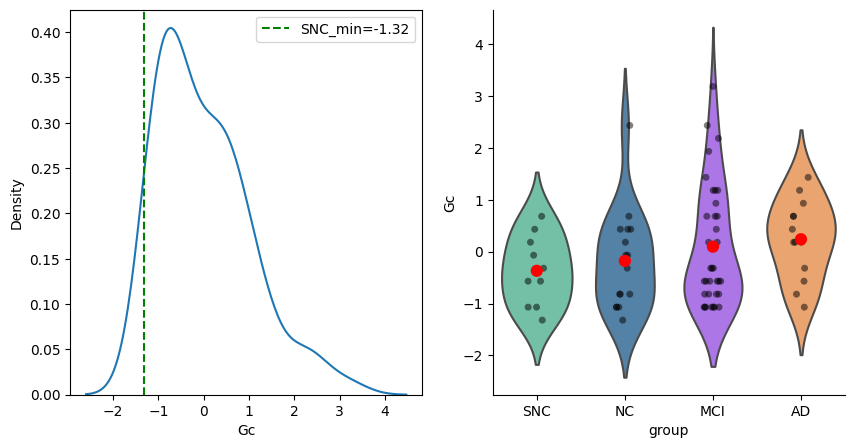

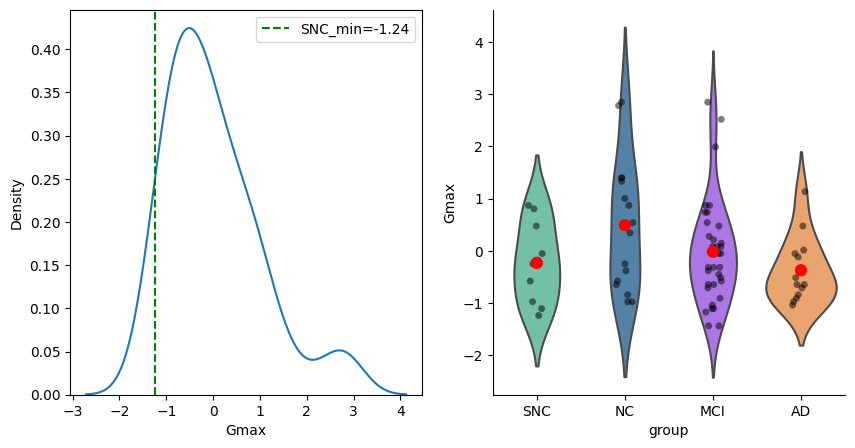

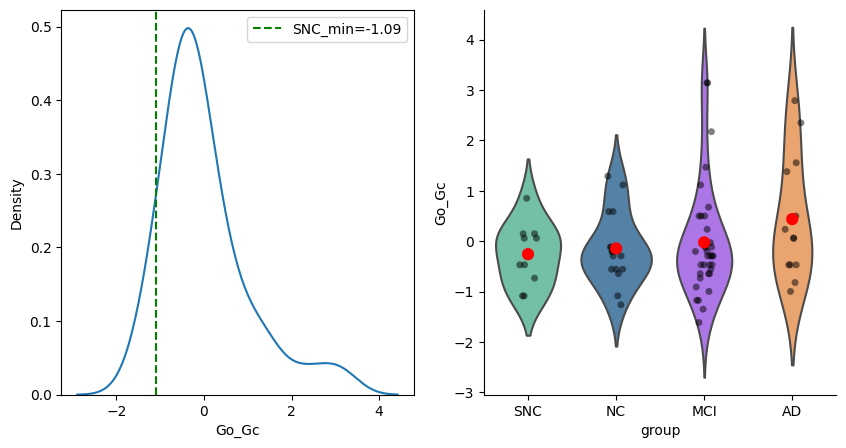

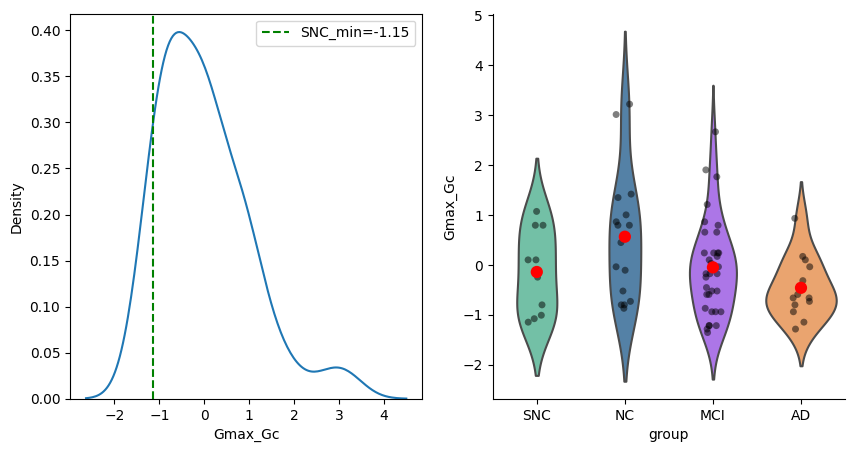

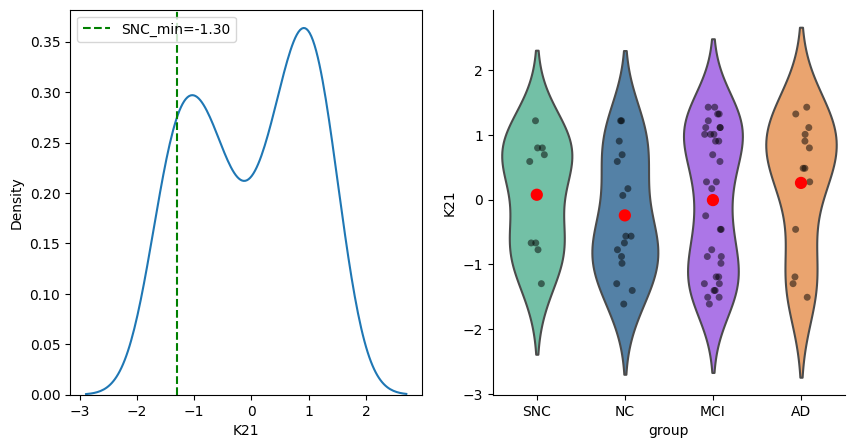

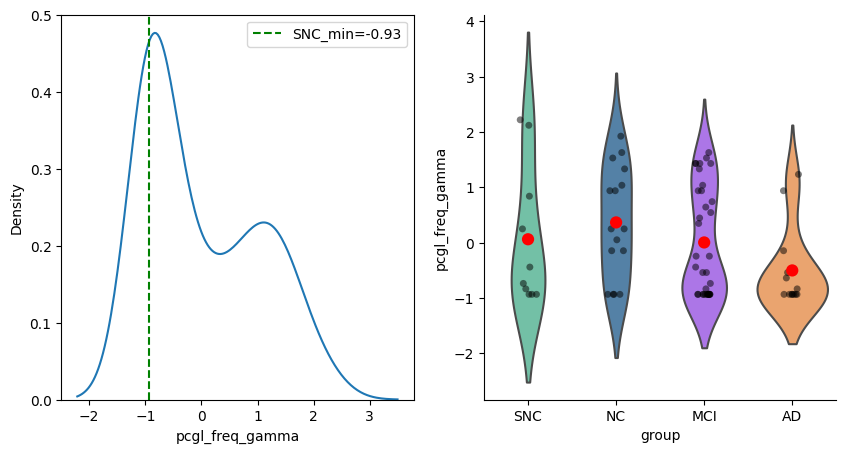

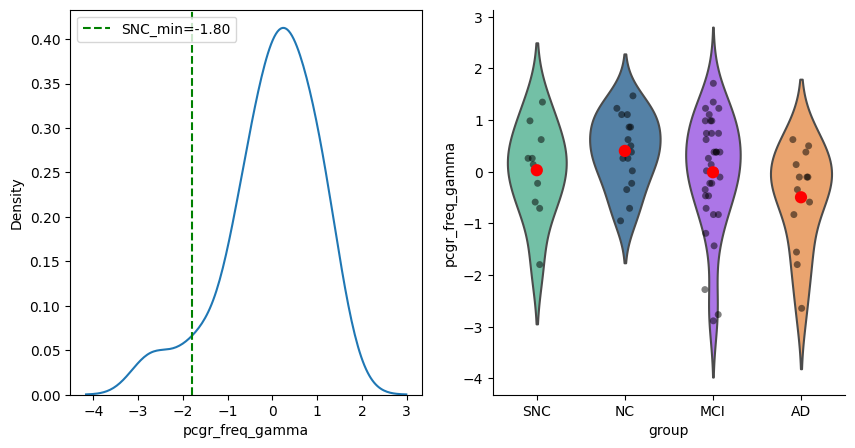

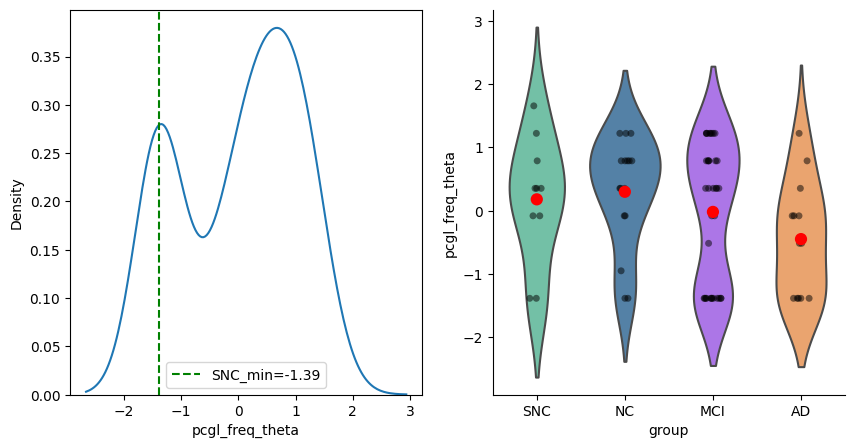

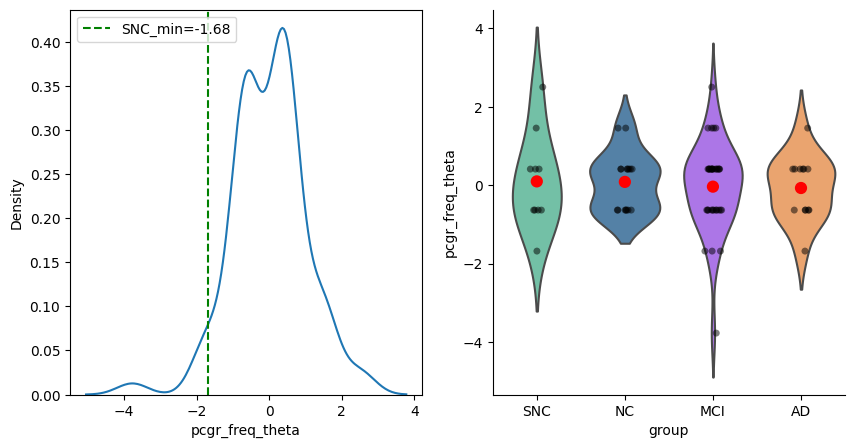

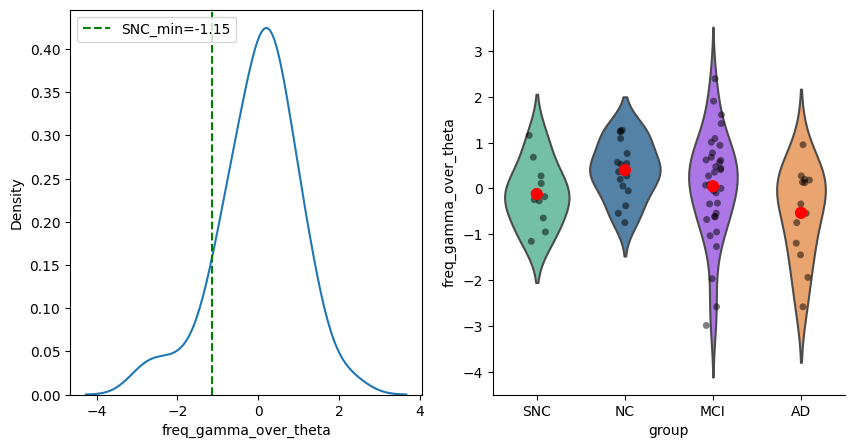

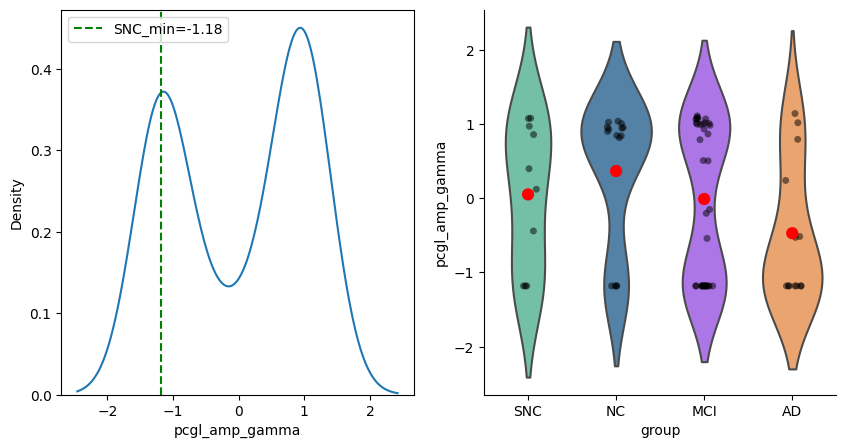

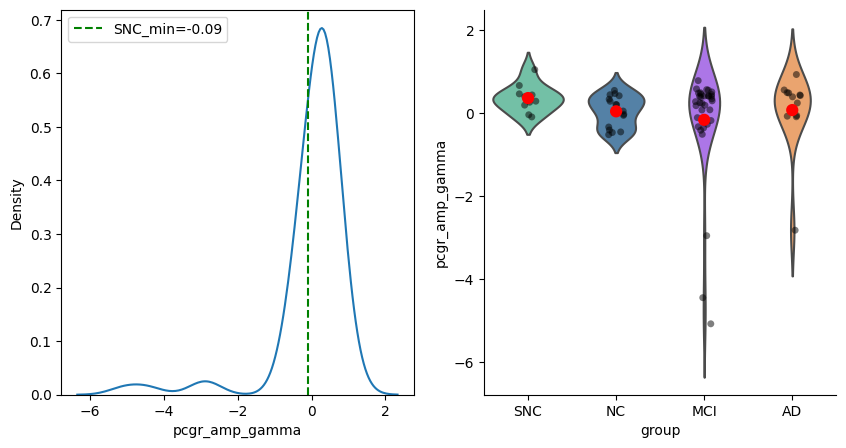

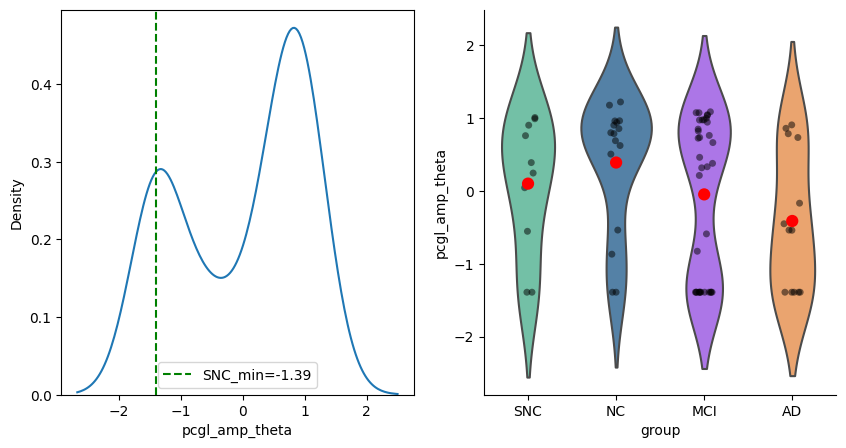

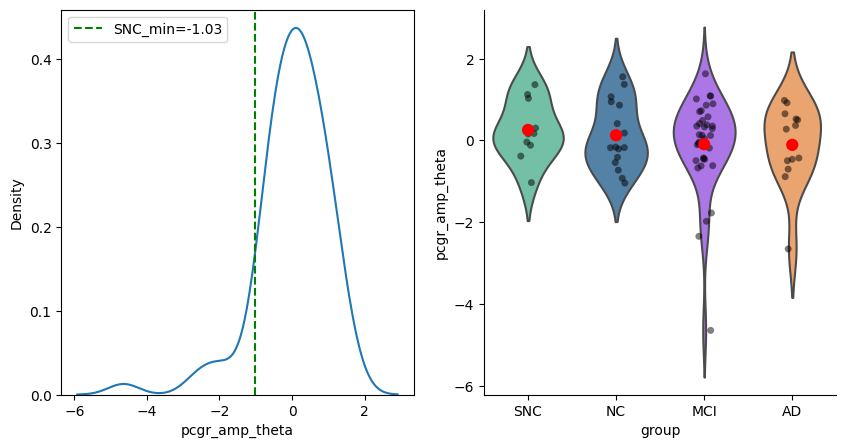

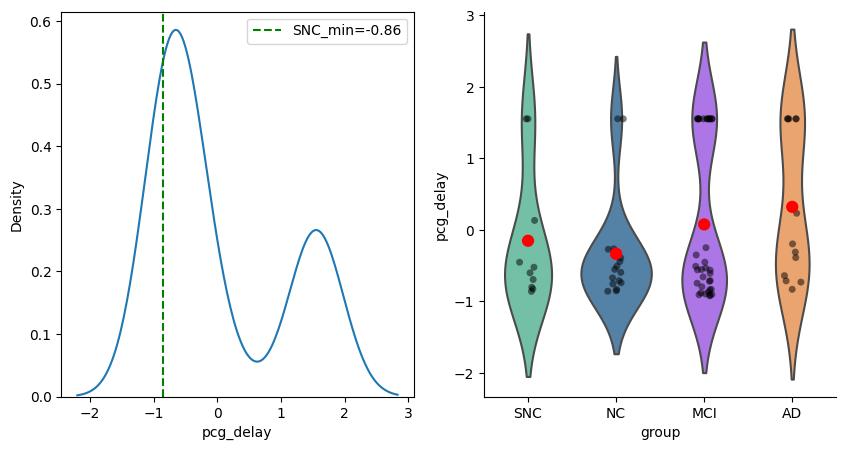

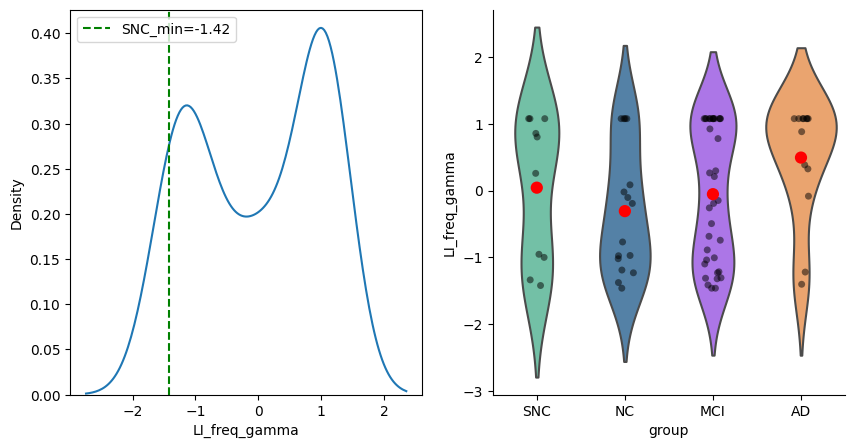

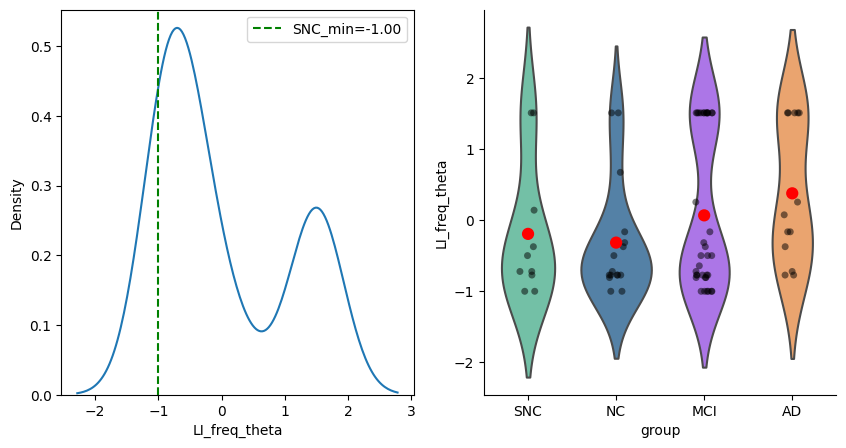

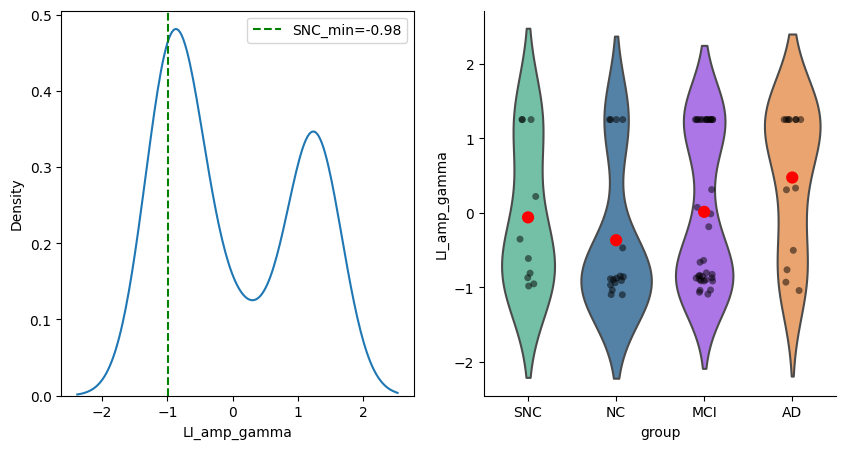

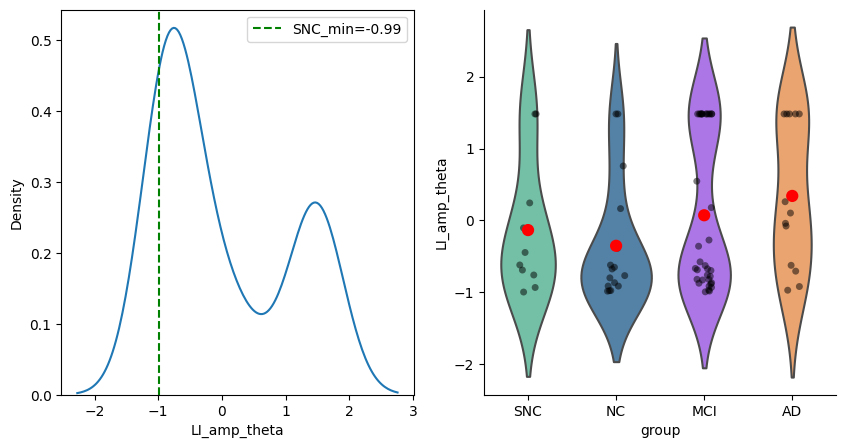

In [11]:
colors = ["#66CDAA","#4682B4","#AB63FA","#FFA15A"]
# plot the distribution of each column in the pd_quadratic_zscors
for i in pd_zscores.columns[2:]:
    # get the highest value in SNC group
    SNC_max = pd_zscores[pd_zscores['group']=='SNC'][i].min()
    figure = plt.figure(figsize=(10,5))
    ax1 = figure.add_subplot(121)
    # plot distribution of the z-scores
    sns.kdeplot(data = pd_zscores, x=i, ax=ax1)
    # plot the highest value in SNC group
    ax1.axvline(SNC_max, color='g', linestyle='--', label=f'SNC_min={SNC_max:.2f}')
    ax1.legend()
    ax2 = figure.add_subplot(122)
    # plot the viollin plot
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    sns.violinplot(x="group", y=i, data=pd_zscores, inner=None,  palette=colors, ax=ax2)
    sns.stripplot(x="group", y=i, data=pd_zscores, color='black', alpha=0.5,zorder=1, ax=ax2)
    sns.pointplot(x="group", y=i, data=pd_zscores, color='r', ci=None, linestyles="", ax=ax2)
    # save the graph 
    plt.savefig(f'/Users/yilewang/workspaces/{i}.png')